In [5]:
import pandas as pd
import warnings
import numpy as np
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBRegressor
import warnings
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("air_quality_data1.csv")
df

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,no,nh3
0,5,63.81,90.35,79.51,7.87,1815.80,0.00,14.06,211.00
1,5,77.15,110.21,80.20,8.35,2056.12,0.00,15.07,239.61
2,5,86.94,126.06,79.51,8.94,2189.64,0.00,16.47,257.49
3,5,96.19,141.36,80.88,9.30,2349.85,0.00,15.58,278.95
4,5,83.11,129.25,76.08,7.99,2109.53,0.00,9.12,246.76
...,...,...,...,...,...,...,...,...,...
26874,1,4.17,6.19,25.02,5.25,327.11,42.92,1.54,2.37
26875,1,4.46,6.80,32.56,6.08,347.14,34.33,1.88,2.12
26876,2,4.84,7.44,40.44,6.50,370.50,25.03,2.18,1.37
26877,2,12.09,17.22,61.69,5.72,567.44,2.12,4.50,23.02


In [7]:
df

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,no,nh3
0,5,63.81,90.35,79.51,7.87,1815.80,0.00,14.06,211.00
1,5,77.15,110.21,80.20,8.35,2056.12,0.00,15.07,239.61
2,5,86.94,126.06,79.51,8.94,2189.64,0.00,16.47,257.49
3,5,96.19,141.36,80.88,9.30,2349.85,0.00,15.58,278.95
4,5,83.11,129.25,76.08,7.99,2109.53,0.00,9.12,246.76
...,...,...,...,...,...,...,...,...,...
26874,1,4.17,6.19,25.02,5.25,327.11,42.92,1.54,2.37
26875,1,4.46,6.80,32.56,6.08,347.14,34.33,1.88,2.12
26876,2,4.84,7.44,40.44,6.50,370.50,25.03,2.18,1.37
26877,2,12.09,17.22,61.69,5.72,567.44,2.12,4.50,23.02


**Data Preprocessing**

In [8]:
df.shape

(26879, 9)

In [9]:
df

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,no,nh3
0,5,63.81,90.35,79.51,7.87,1815.80,0.00,14.06,211.00
1,5,77.15,110.21,80.20,8.35,2056.12,0.00,15.07,239.61
2,5,86.94,126.06,79.51,8.94,2189.64,0.00,16.47,257.49
3,5,96.19,141.36,80.88,9.30,2349.85,0.00,15.58,278.95
4,5,83.11,129.25,76.08,7.99,2109.53,0.00,9.12,246.76
...,...,...,...,...,...,...,...,...,...
26874,1,4.17,6.19,25.02,5.25,327.11,42.92,1.54,2.37
26875,1,4.46,6.80,32.56,6.08,347.14,34.33,1.88,2.12
26876,2,4.84,7.44,40.44,6.50,370.50,25.03,2.18,1.37
26877,2,12.09,17.22,61.69,5.72,567.44,2.12,4.50,23.02


In [10]:
df.dtypes

AQI        int64
PM2.5    float64
PM10     float64
NO2      float64
SO2      float64
CO       float64
O3       float64
no       float64
nh3      float64
dtype: object

In [11]:
df.isna().sum()

AQI      0
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
O3       0
no       0
nh3      0
dtype: int64

In [12]:
df.dropna(inplace=True)


In [13]:
df

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,no,nh3
0,5,63.81,90.35,79.51,7.87,1815.80,0.00,14.06,211.00
1,5,77.15,110.21,80.20,8.35,2056.12,0.00,15.07,239.61
2,5,86.94,126.06,79.51,8.94,2189.64,0.00,16.47,257.49
3,5,96.19,141.36,80.88,9.30,2349.85,0.00,15.58,278.95
4,5,83.11,129.25,76.08,7.99,2109.53,0.00,9.12,246.76
...,...,...,...,...,...,...,...,...,...
26874,1,4.17,6.19,25.02,5.25,327.11,42.92,1.54,2.37
26875,1,4.46,6.80,32.56,6.08,347.14,34.33,1.88,2.12
26876,2,4.84,7.44,40.44,6.50,370.50,25.03,2.18,1.37
26877,2,12.09,17.22,61.69,5.72,567.44,2.12,4.50,23.02


In [14]:
df.AQI.value_counts()

AQI
2    10638
1     8768
3     3342
4     2546
5     1585
Name: count, dtype: int64

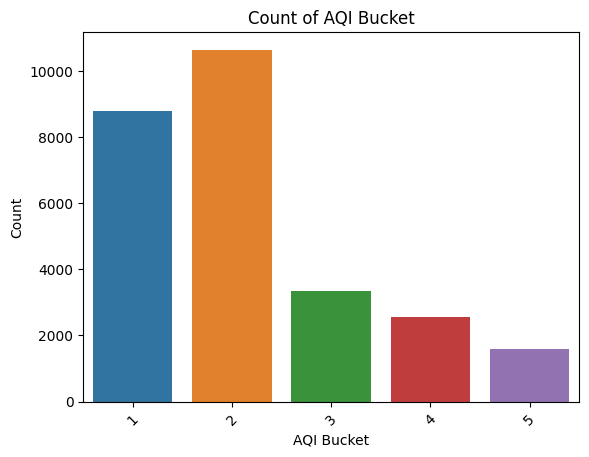

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'AQI_Bucket Name' is the correct column name
sns.countplot(x='AQI', data=df)
plt.title('Count of AQI Bucket')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


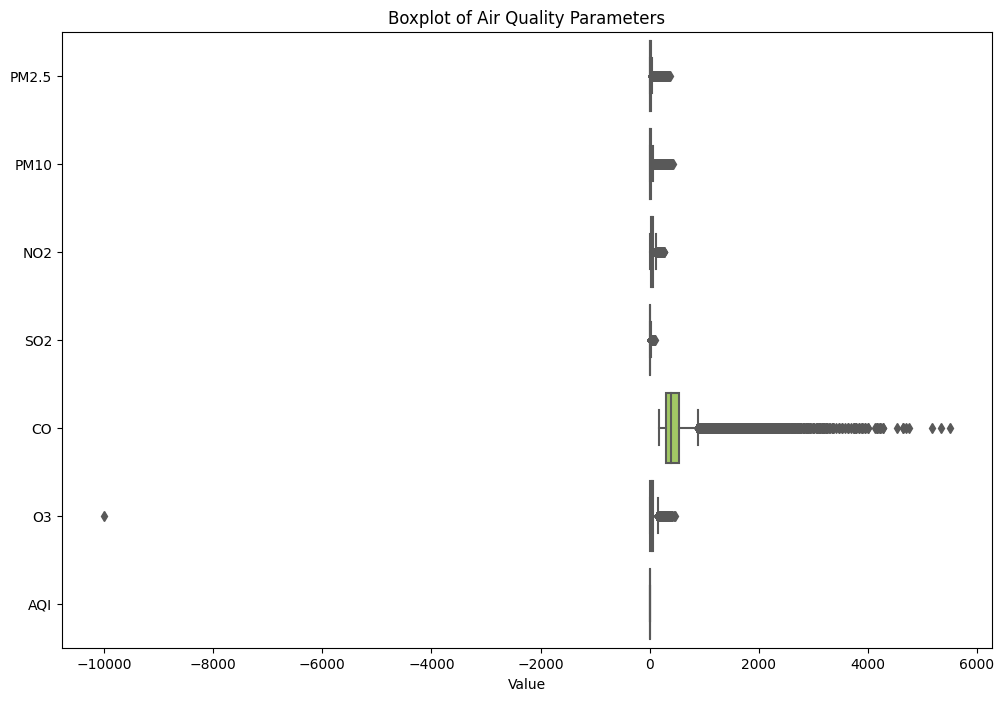

In [12]:
columns_to_plot = ["PM2.5","PM10","NO2","SO2","CO","O3",'AQI']

# Draw boxplot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns_to_plot], orient='h', palette='Set2')
plt.xlabel('Value')
plt.title('Boxplot of Air Quality Parameters')
plt.show()

In [13]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Select the columns you want to plot
# columns_to_plot = ["PM2.5","PM10","NO2","SO2","CO","O3"]

# # Define a function to detect and handle outliers using IQR method
# def handle_outliers(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     data_clipped = data.clip(lower=lower_bound, upper=upper_bound)
#     return data_clipped

# # Handle outliers for each column
# for col in columns_to_plot:
#     df[col] = handle_outliers(df[col])

# # Draw boxplot using Seaborn after handling outliers
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df[columns_to_plot], orient='h', palette='Set2')
# plt.xlabel('Value')
# plt.title('Boxplot of Air Quality Parameters (Outliers Handled)')
# plt.show()


<Figure size 1200x800 with 0 Axes>

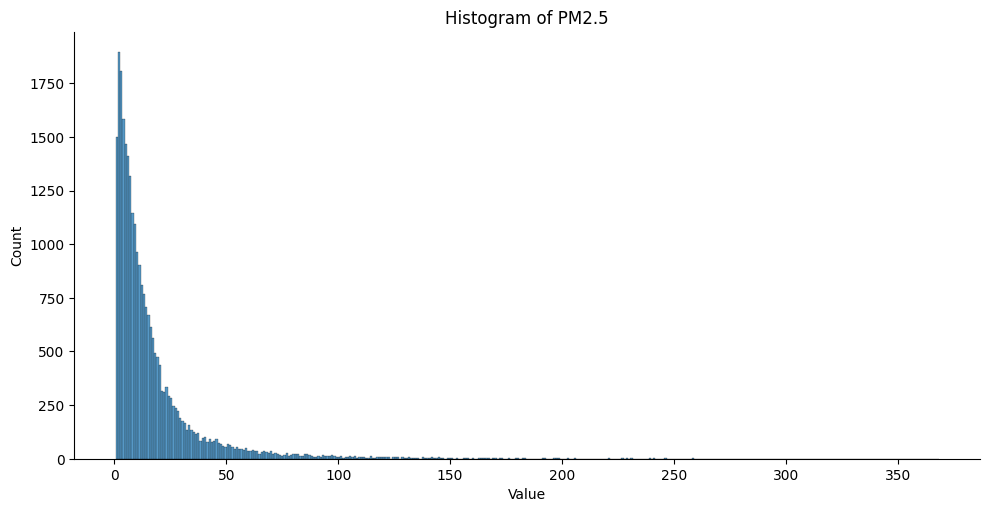

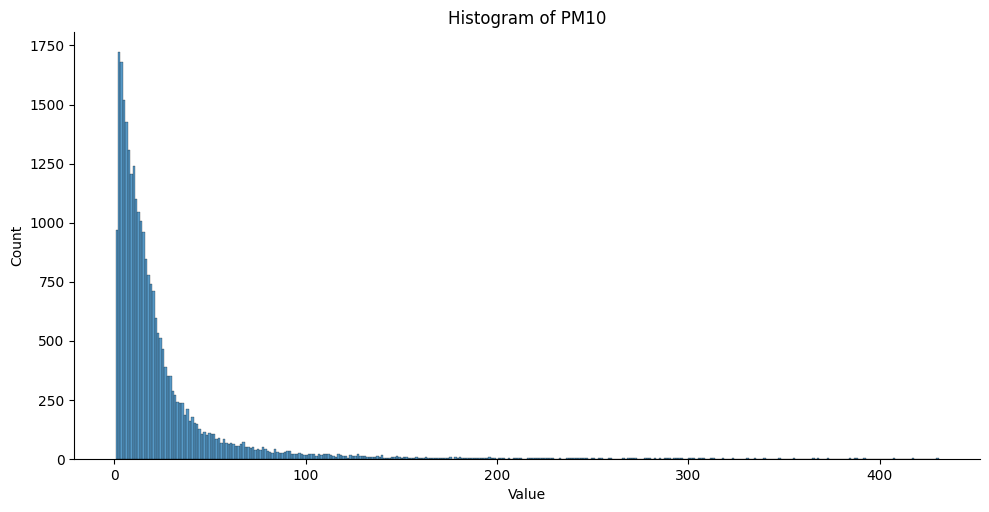

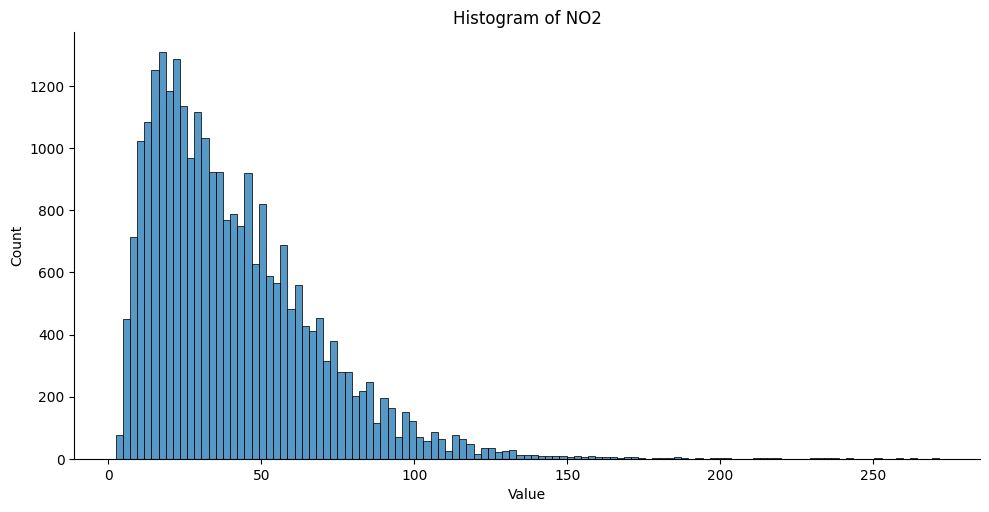

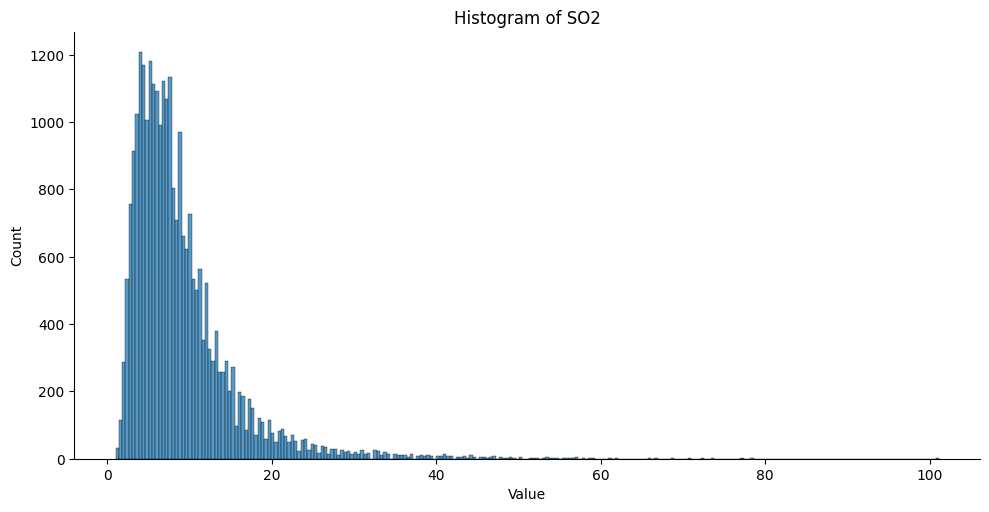

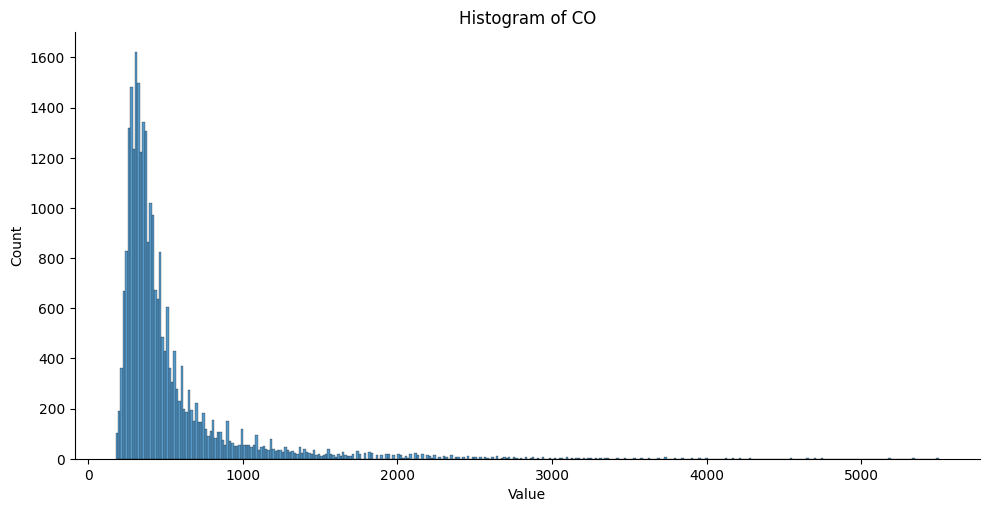

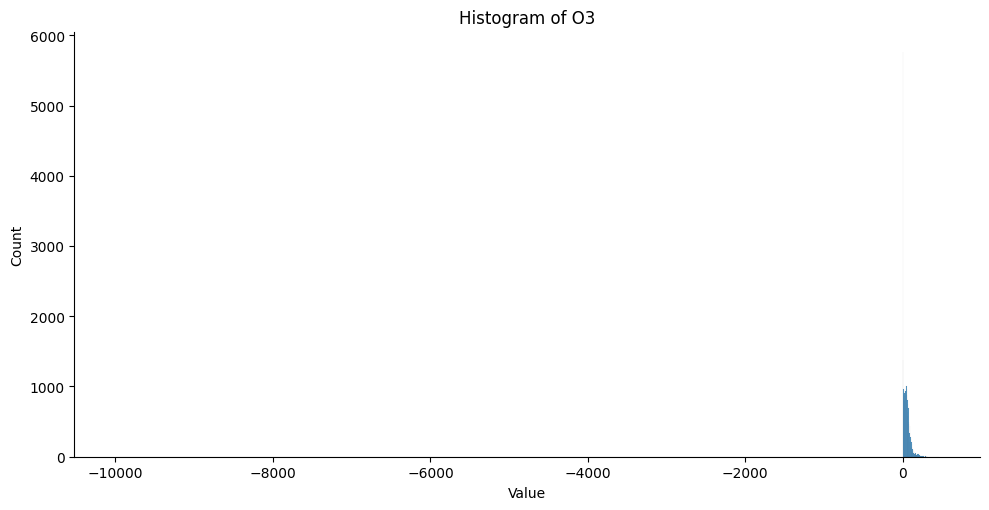

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to plot
columns_to_plot = ["PM2.5","PM10","NO2","SO2","CO","O3"]

# Draw separate histograms for each column using a loop
plt.figure(figsize=(12, 8))
for col in columns_to_plot:
    sns.displot(data=df[col], kind='hist', palette='Set2', aspect=2)
    plt.xlabel('Value')
    plt.title(f'Histogram of {col}')
    plt.show()


In [15]:
df

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,no,nh3
0,5,63.81,90.35,79.51,7.87,1815.80,0.00,14.06,211.00
1,5,77.15,110.21,80.20,8.35,2056.12,0.00,15.07,239.61
2,5,86.94,126.06,79.51,8.94,2189.64,0.00,16.47,257.49
3,5,96.19,141.36,80.88,9.30,2349.85,0.00,15.58,278.95
4,5,83.11,129.25,76.08,7.99,2109.53,0.00,9.12,246.76
...,...,...,...,...,...,...,...,...,...
26874,1,4.17,6.19,25.02,5.25,327.11,42.92,1.54,2.37
26875,1,4.46,6.80,32.56,6.08,347.14,34.33,1.88,2.12
26876,2,4.84,7.44,40.44,6.50,370.50,25.03,2.18,1.37
26877,2,12.09,17.22,61.69,5.72,567.44,2.12,4.50,23.02


In [16]:
df.describe()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,no,nh3
count,26879.000000,26879.000000,26879.000000,26879.000000,26879.000000,26879.000000,26879.000000,26879.000000,26879.000000
mean,2.164478,17.152351,22.370288,40.750872,9.038054,510.623993,41.425518,2.733628,22.043931
std,1.154612,23.955793,29.688554,26.745690,6.496803,391.471430,75.222955,3.690578,53.287561
min,1.000000,0.500000,0.660000,2.310000,1.040000,178.580000,-9999.000000,0.010000,0.000000
25%,1.000000,4.510000,6.470000,20.220000,4.950000,307.080000,4.600000,0.990000,0.190000
50%,2.000000,9.850000,13.640000,34.960000,7.390000,387.190000,33.970000,1.680000,2.510000
75%,3.000000,19.700000,25.570000,55.520000,10.970000,540.730000,62.940000,2.995000,16.760000
max,5.000000,368.430000,430.840000,271.440000,101.090000,5500.790000,457.760000,65.860000,729.560000


In [17]:
df.columns

Index(['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'no', 'nh3'], dtype='object')

In [18]:
df

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,no,nh3
0,5,63.81,90.35,79.51,7.87,1815.80,0.00,14.06,211.00
1,5,77.15,110.21,80.20,8.35,2056.12,0.00,15.07,239.61
2,5,86.94,126.06,79.51,8.94,2189.64,0.00,16.47,257.49
3,5,96.19,141.36,80.88,9.30,2349.85,0.00,15.58,278.95
4,5,83.11,129.25,76.08,7.99,2109.53,0.00,9.12,246.76
...,...,...,...,...,...,...,...,...,...
26874,1,4.17,6.19,25.02,5.25,327.11,42.92,1.54,2.37
26875,1,4.46,6.80,32.56,6.08,347.14,34.33,1.88,2.12
26876,2,4.84,7.44,40.44,6.50,370.50,25.03,2.18,1.37
26877,2,12.09,17.22,61.69,5.72,567.44,2.12,4.50,23.02


In [19]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with 'aqi' column

# Create a function to generate random values within a range
def generate_random_value(low, high):
    return np.random.randint(low, high + 1)

# Define a function to map AQI levels to corresponding AQI values
def map_aqi_to_aqi_value(aqi):
    if aqi == 1:
        return generate_random_value(0, 50)
    elif aqi == 2:
        return generate_random_value(51, 100)
    elif aqi == 3:
        return generate_random_value(101, 150)
    elif aqi == 4:
        return generate_random_value(151, 200)
    elif aqi == 5:
        return generate_random_value(201, 250)
    else:
        return None  # Handle other cases if necessary

# Apply the function to create a new column 'aqi_value'
df['aqi_value'] = df['AQI'].apply(map_aqi_to_aqi_value)


In [20]:
df

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,no,nh3,aqi_value
0,5,63.81,90.35,79.51,7.87,1815.80,0.00,14.06,211.00,248
1,5,77.15,110.21,80.20,8.35,2056.12,0.00,15.07,239.61,206
2,5,86.94,126.06,79.51,8.94,2189.64,0.00,16.47,257.49,249
3,5,96.19,141.36,80.88,9.30,2349.85,0.00,15.58,278.95,231
4,5,83.11,129.25,76.08,7.99,2109.53,0.00,9.12,246.76,245
...,...,...,...,...,...,...,...,...,...,...
26874,1,4.17,6.19,25.02,5.25,327.11,42.92,1.54,2.37,15
26875,1,4.46,6.80,32.56,6.08,347.14,34.33,1.88,2.12,18
26876,2,4.84,7.44,40.44,6.50,370.50,25.03,2.18,1.37,84
26877,2,12.09,17.22,61.69,5.72,567.44,2.12,4.50,23.02,77


In [21]:
X = df.drop(['AQI','aqi_value'], axis = 1)
y = df['aqi_value']


In [22]:
df.drop(['AQI'],axis=1,inplace=True)

In [23]:
df.to_csv("aqidata_clean.csv",index=False)

In [24]:
X

,PM2.5,PM10,NO2,SO2,CO,O3,no,nh3
0,63.81,90.35,79.51,7.87,1815.80,0.00,14.06,211.00
1,77.15,110.21,80.20,8.35,2056.12,0.00,15.07,239.61
2,86.94,126.06,79.51,8.94,2189.64,0.00,16.47,257.49
3,96.19,141.36,80.88,9.30,2349.85,0.00,15.58,278.95
4,83.11,129.25,76.08,7.99,2109.53,0.00,9.12,246.76
...,...,...,...,...,...,...,...,...
26874,4.17,6.19,25.02,5.25,327.11,42.92,1.54,2.37
26875,4.46,6.80,32.56,6.08,347.14,34.33,1.88,2.12
26876,4.84,7.44,40.44,6.50,370.50,25.03,2.18,1.37
26877,12.09,17.22,61.69,5.72,567.44,2.12,4.50,23.02


In [25]:
y

0        248
1        206
2        249
3        231
4        245
        ... 
26874     15
26875     18
26876     84
26877     77
26878    111
Name: aqi_value, Length: 26879, dtype: int64

In [26]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

gbc = GradientBoostingRegressor(random_state=42, learning_rate=0.1, n_estimators=256, subsample=0.75)
gbc.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)

print('*'*10)

**********
**********
R2 for train data 0.8919000368915243
R2 for test data 0.8822973093322094
**********
RMSE for train data 19.699890906065477
RMSE for test data 20.34447545722915
**********
**********


In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42, max_depth=7, n_estimators=128)
rfr.fit(X_train, y_train)


print('*'*10)

# prediction
train_prediction= rfr.predict(X_train)
test_prediction= rfr.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)



print('*'*10)

**********
**********
R2 for train data 0.8917568585699317
R2 for test data 0.8834847934605852
**********
RMSE for train data 19.712932834492875
RMSE for test data 20.241589175103908
**********
**********


In [29]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42, max_depth= 7)
dt.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= dt.predict(X_train)
test_prediction= dt.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)


print('*'*10)

**********
**********
R2 for train data 0.8894050814985033
R2 for test data 0.8808272836371601
**********
RMSE for train data 19.925931579340617
RMSE for test data 20.47112549790754
**********
**********


In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= lr.predict(X_train)
test_prediction= lr.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X,y,cv=5)
print('cv_score :',score.mean())

print('*'*10)

**********
**********
R2 for train data 0.6375558086314111
R2 for test data -0.5532986912518079
**********
RMSE for train data 36.07211611446853
RMSE for test data 73.90618582150653
**********
cv_score : 0.39053109214388215
**********


In [31]:
# from sklearn.svm import SVR
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.model_selection import cross_val_score

# # Create an SVM regressor
# svm_regressor = SVR()

# # Fit the model
# svm_regressor.fit(X_train, y_train)

# print('*' * 10)

# # Predictions
# train_prediction = svm_regressor.predict(X_train)
# test_prediction = svm_regressor.predict(X_test)
# print('*' * 10)

# # Evaluation
# print('R2 for train data:', r2_score(y_train, train_prediction))
# print('R2 for test data:', r2_score(y_test, test_prediction))
# print('*' * 10)

# print('RMSE for train data:', np.sqrt(mean_squared_error(y_train, train_prediction)))
# print('RMSE for test data:', np.sqrt(mean_squared_error(y_test, test_prediction)))
# print('*' * 10)


# print('MSE for train data:',(mean_squared_error(y_train, train_prediction)))
# print('MSE for test data:',(mean_squared_error(y_test, test_prediction)))
# print('*' * 10)


# print('AMSE for train data:',(mean_absolute_error(y_train, train_prediction)))
# print('AMSE for test data:',(mean_absolute_error(y_test, test_prediction)))
# print('*' * 10)



In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the AQI dataset
df = pd.read_csv('aqidata_clean.csv')

# Preprocess the data
X = df.drop('aqi_value', axis=1).values
y = df['aqi_value'].values.reshape(-1, 1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Adjusting input shape
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Adjusting input shape

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)  # Output layer adjusted to predict a single value
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# Calculate R-squared score
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)
print(f'Train R^2 Score: {train_r2:.2f}')
print(f'Test R^2 Score: {test_r2:.2f}')


Epoch 1/100
605/605 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1764.2335 - val_loss: 1068.0439
Epoch 2/100
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 758.7826 - val_loss: 723.5991
Epoch 3/100
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 695.8133 - val_loss: 646.4629
Epoch 4/100
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 641.6629 - val_loss: 702.5010
Epoch 5/100
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 648.1380 - val_loss: 672.4944
Epoch 6/100
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 601.5314 - val_loss: 694.0058
Epoch 7/100
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 591.0412 - val_loss: 561.0338
Epoch 8/100
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 573.6471 - val_loss: 575.9493
Epoch 9/100
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 604.0471 - val_loss: 574.7921
Epoch 10/100
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 623.2153 - val_loss: 567.0810
Epoch 11/100
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 551.2089 - val_loss: 566.

## user prediction

In [45]:
# Save the model
model.save('aqi_model1.h5')

from tensorflow.keras.models import load_model

# Separate code for prediction based on user input
def predict_aqi(input_data):
    # Load the model
    loaded_model = load_model('aqi_model1.h5')
    
    # Reshape input data
    input_data = np.array(input_data).reshape(1, -1, 1)
    
    # Make prediction
    prediction = loaded_model.predict(input_data)
    
    return prediction

# Example usage:
user_input = [26.82,35.92,81.57,8.94,827.79,0.0,3.9,48.28]  
prediction = predict_aqi(user_input)
print("Predicted AQI:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Predicted AQI: 152.99998


In [44]:
from tensorflow.keras.models import load_model

# Separate code for prediction based on user input
def predict_aqi(input_data):
    # Load the model
    loaded_model = load_model('aqi_model1.h5')
    
    # Reshape input data
    input_data = np.array(input_data).reshape(1, -1, 1)
    
    # Make prediction
    prediction = loaded_model.predict(input_data)
    
    return prediction

# Example usage:
user_input = [28.01,37.49,67.86,9.66,847.82,0.34,4.69,65.27]  
prediction = predict_aqi(user_input)
print("Predicted AQI:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predicted AQI: 152.49858


In [38]:
import pickle

# Save the model to a file
with open('rfr.pkl', 'wb') as file:
    pickle.dump(rfr, file)



In [46]:
# Load the model from the file
with open('rfr.pkl', 'rb') as file:
    rfr_loaded = pickle.load(file)

# Now, you can use rfr_loaded to make predictions just as you would with the original model
rfr_loaded.predict([[26.82,35.92,81.57,8.94,827.79,0.0,3.9,48.28]])


array([156.42526739])

In [43]:
# Load the model from the file
with open('rfr.pkl', 'rb') as file:
    rfr_loaded = pickle.load(file)

# Now, you can use rfr_loaded to make predictions just as you would with the original model
rfr_loaded.predict([[28.01,37.49,67.86,9.66,847.82,0.34,4.69,65.27]])


array([156.78326298])